# Analysis on bladder traces and neuron firings


In [1]:
# import packages
import numpy as np
import scipy.sparse
from scipy.sparse import coo_matrix
from scipy.sparse import load_npz
from scipy.integrate import simps
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
# transform npz data to numpy array
def read_npz(filename):
    data = load_npz(filename)
    data = data.toarray()
    data = np.array(data)
    return data

In [9]:
# load data as numpy matrixs
spn = read_npz('1_08_31_15_15_20.0ml_50.0Hz_SPN.npz')
pel = read_npz('1_08_31_15_15_20.0ml_50.0Hz_Pel.npz')
pud = read_npz('1_08_31_15_15_20.0ml_50.0Hz_Pud.npz')
pmc = read_npz('1_08_31_15_15_20.0ml_50.0Hz_PMC.npz')
fb = read_npz('1_08_31_15_15_20.0ml_50.0Hz_FB.npz')
ind = read_npz('1_08_31_15_15_20.0ml_50.0Hz_IN_D.npz')
inmn = read_npz('1_08_31_15_15_20.0ml_50.0Hz_IN_Mn.npz')
inmp = read_npz('1_08_31_15_15_20.0ml_50.0Hz_IN_Mp.npz')

In [10]:
# load bladder
bladder = np.loadtxt("1_08_31_15_15_bp_20.0ml_50.0.txt")
print(bladder.shape)

(50001,)


In [5]:
def plot_density(ax, gs, i, record_array, colors, ylabel_name, title):
    # ax.append(plt.subplot(gs[i]))
    ax = plt.subplot(gs[i])
    np_data = np.array(record_array)
    np_density = np_data.sum(axis=0)/30
    ax.plot(np.linspace(0, 10000, len(np_density)), np_density, color=colors[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylim([0, 1])
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_ylabel(ylabel_name, fontsize=12)
    ax.set_title(title)

In [14]:
def plot_bladder_pressure(bladder, ax, gs, i, colors):
    # ax.append(plt.subplot(gs[i]))
    ax = plt.subplot(gs[i])
    ax.plot(np.linspace(0, len(bladder) // 10, len(bladder)), bladder,color=colors[i])
    ax.set_ylim([15, 30])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('Pressure', fontsize=12)
    ax.set_xlabel('Time (ms)', fontsize=12)
    # ax.set_title("Bladder")

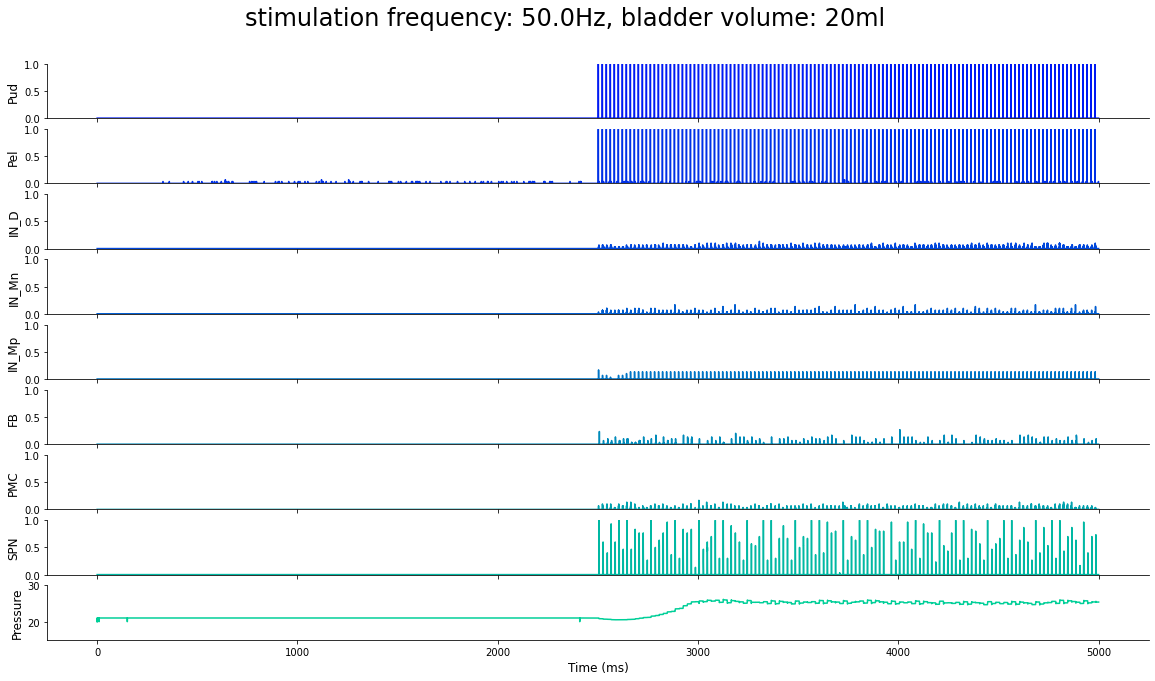

In [15]:
# plot neuron firings

fig, ax = plt.subplots(figsize=(18, 10), sharex=True)
fig.suptitle("stimulation frequency: 50.0Hz, bladder volume: 20ml", fontsize=24)
gs = gridspec.GridSpec(9, 1)
gs.update(left=0.1, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0.2)
# ax = []
# color map
cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0.1, 0.9, 10))
# plot figures
plot_density(ax, gs, 0, pud, colors, 'Pud','')
plot_density(ax, gs, 1, pel, colors, 'Pel', '')
plot_density(ax, gs, 2, ind, colors, 'IN_D', '')
plot_density(ax, gs, 3, inmn, colors, 'IN_Mn', '')
plot_density(ax, gs, 4, inmp, colors, 'IN_Mp', '')
plot_density(ax, gs, 5, fb, colors, 'FB', '')
plot_density(ax, gs, 6, pmc, colors, 'PMC', '')
plot_density(ax, gs, 7, spn, colors, 'SPN', '')
plot_bladder_pressure(bladder, ax, gs, 8, colors,)


# save to pdf files
# plt.savefig('Neuron firings', format="pdf", transparent=True)
plt.show()
# plt.close()



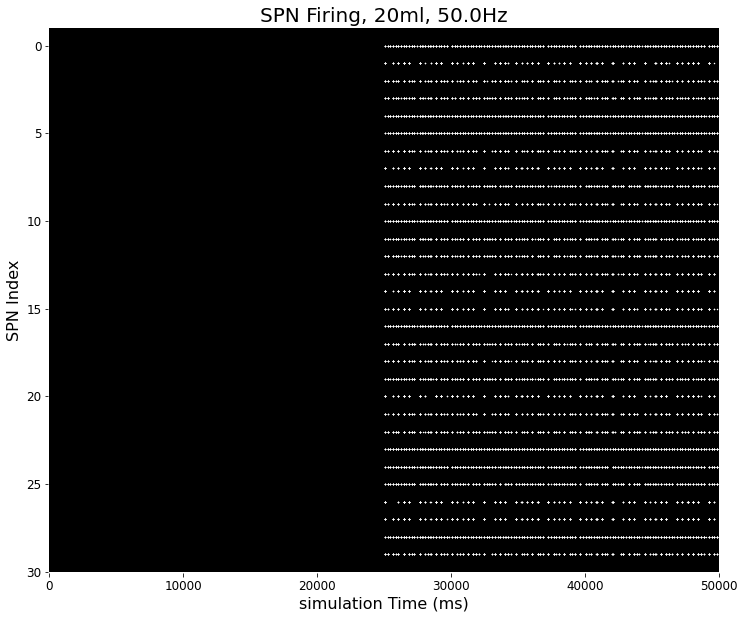

In [16]:
# plot spn raster
states = spn[0]
cellNums = 30
for i in range(1, cellNums):
    states = np.vstack((states, spn[i]))
shape = (len(states), len(states[0]))
states = coo_matrix(states)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, facecolor='black')
ax.plot(states.col, states.row, 's', color='white', ms=0.5)

ax.set_xlim(0, states.shape[1])
ax.set_ylim(-1, states.shape[0])
ax.set_aspect('auto')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.invert_yaxis()
ax.set_title("SPN Firing, 20ml, 50.0Hz", fontsize=20)
# Move left and bottom spines outward by 10 points
ax.spines['left'].set_position(('outward', 1))  # both, change 10 to 20
ax.spines['bottom'].set_position(('outward', 1))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
tStop = 10000
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('SPN Index', fontsize=16)
plt.xlabel('simulation Time (ms)', fontsize=16)
plt.show()
# fileName = time.strftime("%m_%d_%H_%M_raster_plot_" + name + "_" + cell_name + ".pdf")
# plt.savefig("raster plot", format="pdf", transparent=False)
# plt.close()